In [42]:
#used for manipulating directory paths
import os

#scientific and vector computation in python
import numpy as np

#Plotting library
from matplotlib import pyplot
#to plot 3D plots
from mpl_toolkits.mplot3d import Axes3D

# for scientifice computing
from scipy import optimize

#tells matplotlib to include graphs within the notebook
%matplotlib inline

# to read csv files
import pandas as pd

data = pd.read_csv(os.path.join("data","advertising.csv"))
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [15]:
X = np.stack((np.ones(1000),data.iloc[:,3],data.iloc[:,0],data.iloc[:,1]))
X = X.T
Y = (data.iloc[:,9])
'''X = m X 2 array where X[1] = daily internet usage and X[2] = daily time spent on site X[3] = age
Y = if clicked on add or not
'''
print(X.shape)
print(Y.shape)

(1000, 4)
(1000,)


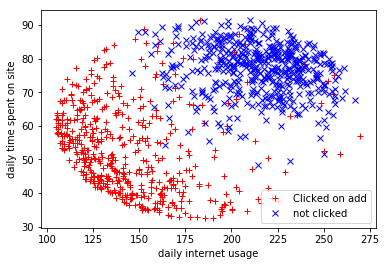

In [23]:
pos = Y==1
neg = Y==0

pyplot.plot(X[pos,1],X[pos,2],"r+")
pyplot.plot(X[neg,1],X[neg,2],"bx")
pyplot.xlabel("daily internet usage")
pyplot.ylabel("daily time spent on site")
pyplot.legend(['Clicked on add','not clicked'])

In [38]:
def sigmoid(z):
    sigm = 1+ np.exp(-z)
    sigm = 1/sigm
    return sigm

In [65]:
def costFunction(X,y,theta):
    J = 0.0
    m = Y.size
    J = -1/m * np.sum(((1-y)*np.log(1-sigmoid(np.dot(X,theta))))+((y)*np.log(sigmoid(np.dot(X,theta)))))
    grad = 1/m*np.dot(X.T,(sigmoid(np.dot(X,theta))-y))
    return J, grad

In [66]:
print(X[:,:3].shape)
J,grad = costFunction(X[:,:3],Y,theta=[0,0,0])
print(J)
print( grad)

(1000, 3)
0.6931471805599454
[ 0.      17.25682  5.92721]


In [69]:
options = {'maxiter' : 400}
initial_theta = np.zeros(3)
x = X[:,:3]
#res = optimize.minimize(computeCost,initial_theta,(X[:,:3],Y),jac = True,method = 'TNC',options = options)
res = optimize.minimize(costFunction,
                        initial_theta,
                        (x, Y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
theta = res.x
print("cost ".cost)
print("theta ".theta)

ValueError: shapes (3,) and (1000,) not aligned: 3 (dim 0) != 1000 (dim 0)

In [75]:
def gradientDescent(X,Y,theta,alpha,num_iters):
    '''num_iters = number of iterations
        alpha = learning rate
        J_history = value of cost function at each iterations
    '''
    m = Y.size
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha/m)*np.dot(X.T,sigmoid(np.dot(X,theta))-Y)
        J_history.append(costFunction(X,Y,theta)[0])
    return theta, J_history

In [83]:
num_iters = 400;
theta, J_history = gradientDescent(x,Y,initial_theta,0.0002,num_iters)
print(theta)
#Fprint(J_history)

[ 0.00717214 -0.00289617  0.00232457]


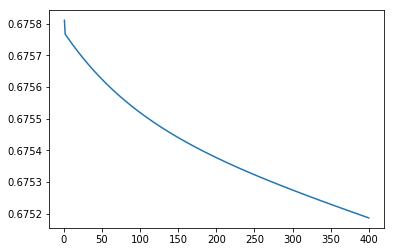

In [82]:
pyplot.plot(np.arange(1,num_iters+1),J_history)

In [ ]:
pos = Y==1
neg = Y==0

pyplot.plot(X[pos,1],X[pos,2],"r+")
pyplot.plot(X[neg,1],X[neg,2],"bx")
pyplot.xlabel("daily internet usage")
pyplot.ylabel("daily time spent on site")
pyplot.legend(['Clicked on add','not clicked'])
pyplot.plot()